In [1]:
# Port Elizabeth Climate (Temperature Forecast)
#Source Code: https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

In [28]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [31]:
df = pd.read_csv("ClimateEngine_Temp.csv")

In [32]:
df.head()

Date  Temp (deg c)
0  1/1/2000         22.33
1  2/1/2000         23.24
2  3/1/2000         21.38
3  4/1/2000         20.07
4  5/1/2000         17.19

In [33]:
df = df.rename(columns={'Date': 'ds', 'Temp (deg c)': 'y'})
df.head()

ds      y
0  1/1/2000  22.33
1  2/1/2000  23.24
2  3/1/2000  21.38
3  4/1/2000  20.07
4  5/1/2000  17.19

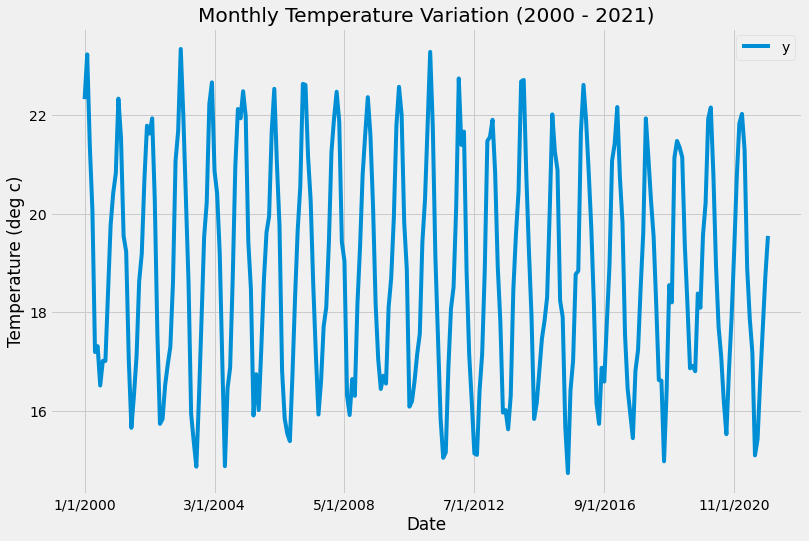

In [34]:
#Visualize the data
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Temperature (deg c)')
ax.set_xlabel('Date')
plt.title('Monthly Temperature Variation (2000 - 2021)')
plt.show()

In [107]:
#Making Stationairy  yt= yt -y(t-1)
 #Making Stationairy  yt= yt -y(t-1)
df['y'] = df['y'] - df['y'].shift(1)

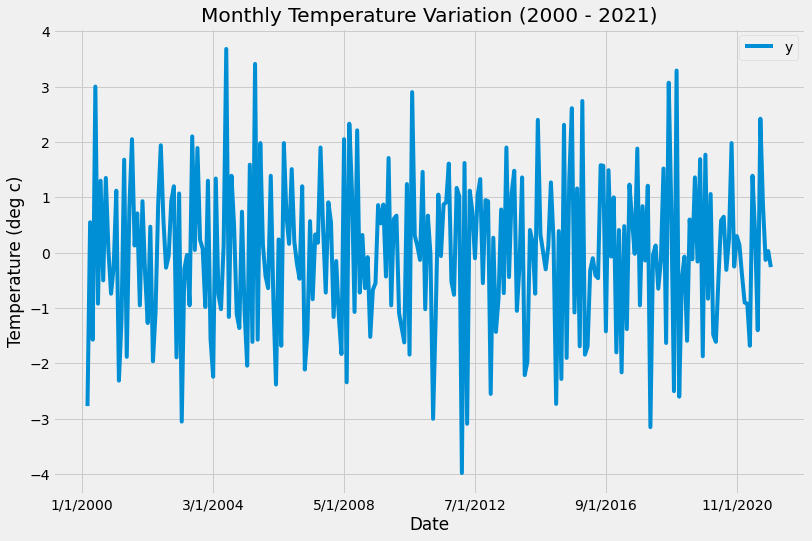

In [108]:
#df.plot()
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Temperature (deg c)')
ax.set_xlabel('Date')
plt.title('Monthly Temperature Variation (2000 - 2021)')
plt.show()

In [37]:
#Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [38]:
my_model.fit(df)

20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()
#In the code snippet above, we instructed Prophet to generate 36 datestamps in the future.

ds
0 2000-01-01
1 2000-02-01
2 2000-03-01
3 2000-04-01
4 2000-05-01

In [40]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

ds      yhat  yhat_lower  yhat_upper
0 2000-01-01  1.291876   -0.008719    2.625641
1 2000-02-01  0.329964   -1.060737    1.729043
2 2000-03-01 -0.966910   -2.309587    0.371158
3 2000-04-01 -1.754550   -3.148689   -0.253720
4 2000-05-01 -1.493801   -2.743688   -0.143865

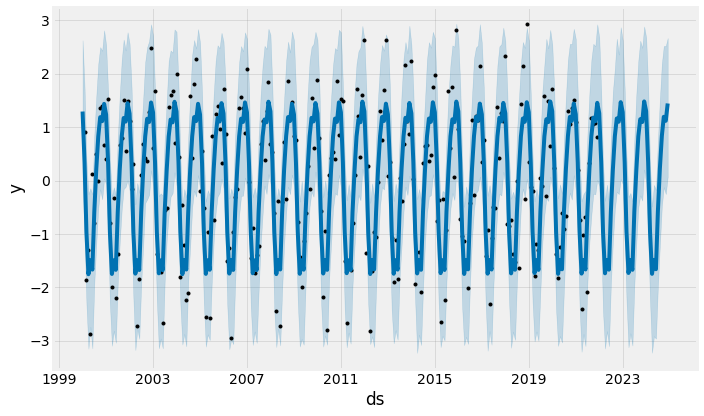

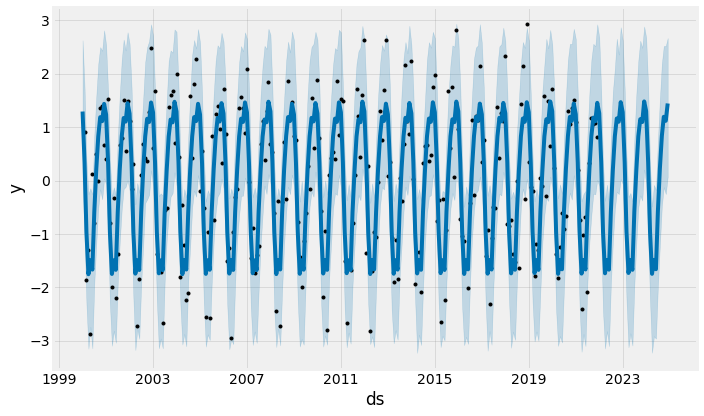

In [41]:
my_model.plot(forecast)

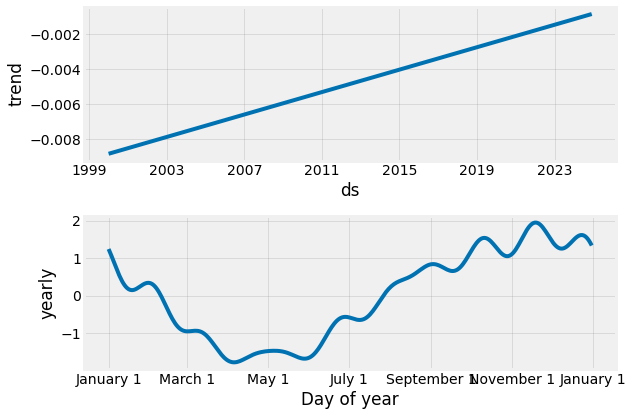

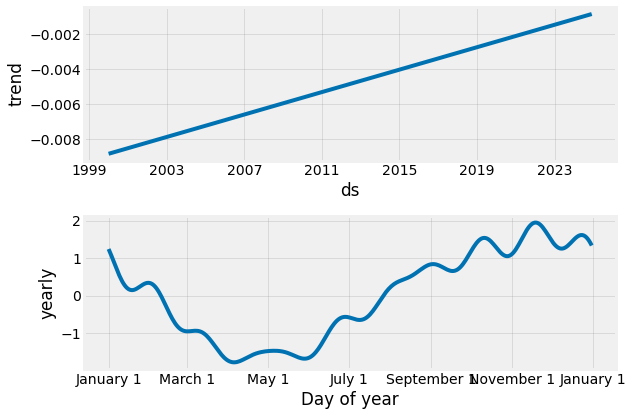

In [42]:
my_model.plot_components(forecast)

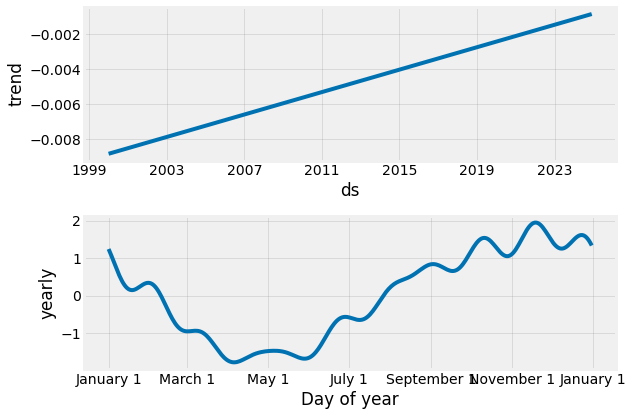

In [43]:
#Plotting the forecasted components
#We can plot the trend and seasonality, components of the forecast as follows:
fig1 = my_model.plot_components(forecast)

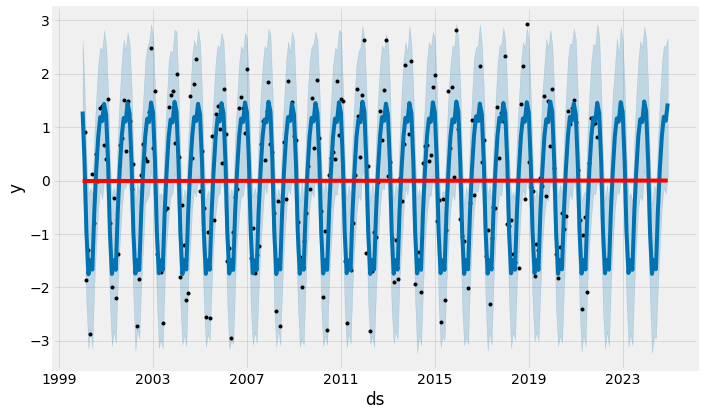

In [44]:
# Adding ChangePoints to Prophet
#Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
#By default, Prophet adds 25 changepoints to the initial 80% of the data-set.
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [45]:
#We can view the dates where the chagepoints occurred.
my_model.changepoints

8     2000-10-01
17    2001-07-01
25    2002-03-01
33    2002-11-01
42    2003-08-01
50    2004-04-01
59    2005-01-01
67    2005-09-01
75    2006-05-01
84    2007-02-01
92    2007-10-01
100   2008-06-01
109   2009-03-01
117   2009-11-01
125   2010-07-01
134   2011-04-01
142   2011-12-01
150   2012-08-01
159   2013-05-01
167   2014-01-01
176   2014-10-01
184   2015-06-01
192   2016-02-01
201   2016-11-01
209   2017-07-01
Name: ds, dtype: datetime64[ns]

20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing


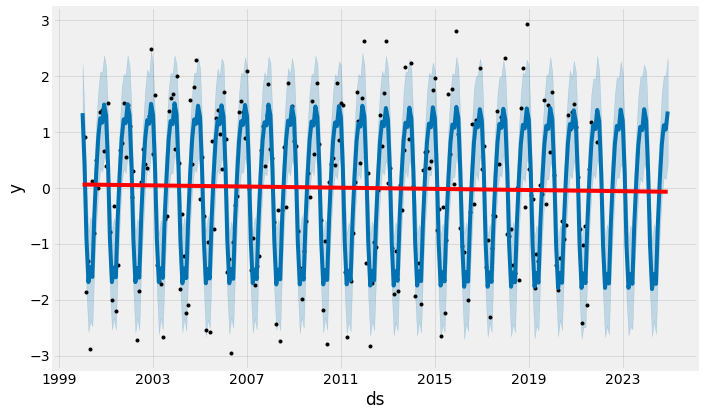

In [46]:
#We can change the inferred changepoint range by setting the changepoint_range
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing


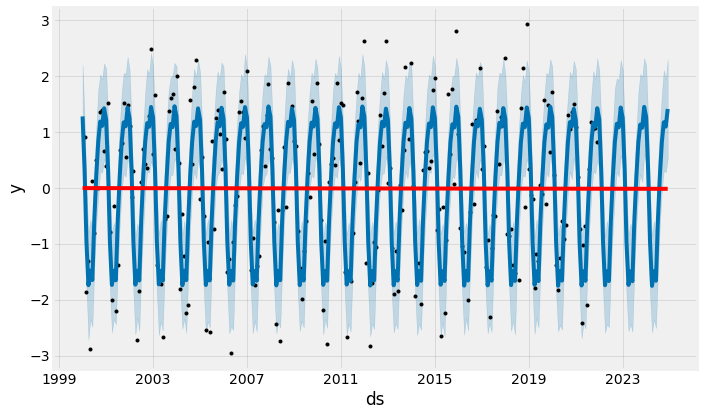

In [47]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing


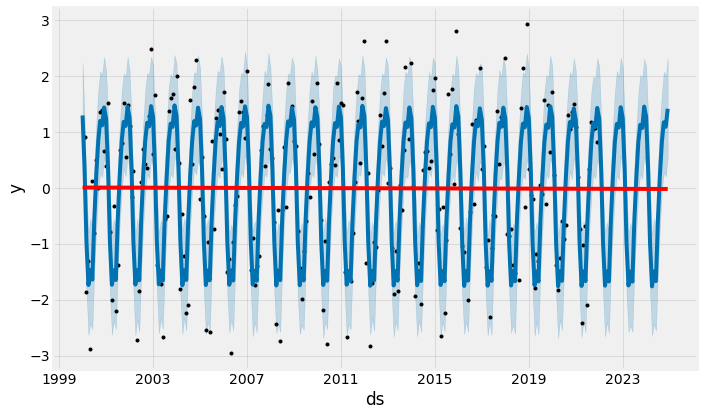

In [48]:
# Adjusting Trend
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing


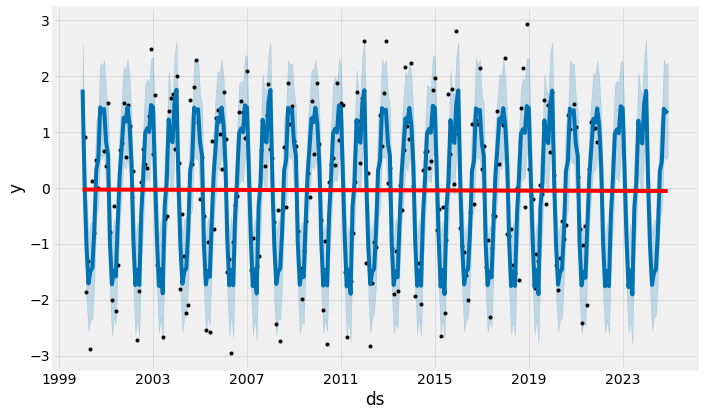

In [49]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [50]:
final_df = pd.DataFrame(forecast)

In [51]:
# 
final_df.tail(36)

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
264 2022-01-01 -0.052350    0.186727    1.957500    -0.052350    -0.052350   
265 2022-02-01 -0.052438   -0.490448    1.288503    -0.052438    -0.052438   
266 2022-03-01 -0.052518   -1.848060   -0.127371    -0.052518    -0.052518   
267 2022-04-01 -0.052606   -2.600626   -0.938737    -0.052606    -0.052606   
268 2022-05-01 -0.052691   -2.354136   -0.617891    -0.052691    -0.052691   
269 2022-06-01 -0.052780   -2.617675   -0.882306    -0.052780    -0.052780   
270 2022-07-01 -0.052865   -1.375372    0.347661    -0.052865    -0.052865   
271 2022-08-01 -0.052953   -0.742123    1.025582    -0.052953    -0.052953   
272 2022-09-01 -0.053041    0.152121    1.817602    -0.053041    -0.053041   
273 2022-10-01 -0.053126    0.181905    1.928023    -0.053126    -0.053126   
274 2022-11-01 -0.053215    0.096903    1.876864    -0.053215    -0.053215   
275 2022-12-01 -0.053300    0.551992    2.266774    -0.053300    -0.053300   
276 2023-01-01 -0.053388    0.610425    2.262276    -0.053388    -0.053388   
277 2023-02-01 -0.053476   -0.575876    1.089001    -0.053476    -0.053476   
278 2023-03-01 -0.053556   -1.777143   -0.018587    -0.053556    -0.053556   
279 2023-04-01 -0.053644   -2.596165   -0.890040    -0.053644    -0.053644   
280 2023-05-01 -0.053729   -2.374775   -0.632120    -0.053729    -0.053729   
281 2023-06-01 -0.053818   -2.789164   -1.048419    -0.053818    -0.053818   
282 2023-07-01 -0.053903   -1.198544    0.538171    -0.053903    -0.053903   
283 2023-08-01 -0.053991   -0.704423    0.927084    -0.053991    -0.053991   
284 2023-09-01 -0.054079    0.304053    2.068702    -0.054079    -0.054079   
285 2023-10-01 -0.054164    0.021213    1.762741    -0.054164    -0.054164   
286 2023-11-01 -0.054253   -0.111013    1.652790    -0.054253    -0.054253   
287 2023-12-01 -0.054338    0.659326    2.371721    -0.054338    -0.054338   
288 2024-01-01 -0.054426    0.855573    2.656960    -0.054426    -0.054426   
289 2024-02-01 -0.054514   -0.820130    0.950413    -0.054514    -0.054514   
290 2024-03-01 -0.054597   -1.869456   -0.147063    -0.054597    -0.054597   
291 2024-04-01 -0.054685   -2.553798   -0.831769    -0.054685    -0.054685   
292 2024-05-01 -0.054770   -2.315195   -0.583585    -0.054770    -0.054770   
293 2024-06-01 -0.054858   -2.275899   -0.559073    -0.054858    -0.054858   
294 2024-07-01 -0.054944   -1.673001    0.104339    -0.054944    -0.054944   
295 2024-08-01 -0.055032   -0.557940    1.119067    -0.055032    -0.055032   
296 2024-09-01 -0.055120   -0.387292    1.323449    -0.055120    -0.055120   
297 2024-10-01 -0.055205    0.578376    2.301393    -0.055205    -0.055205   
298 2024-11-01 -0.055294    0.517218    2.187120    -0.055294    -0.055294   
299 2024-12-01 -0.055379    0.538093    2.241935    -0.055379    -0.055379   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
264        1.161718              1.161718              1.161718  1.161718   
265        0.451460              0.451460              0.451460  0.451460   
266       -0.895682             -0.895682             -0.895682 -0.895682   
267       -1.706470             -1.706470             -1.706470 -1.706470   
268       -1.433067             -1.433067             -1.433067 -1.433067   
269       -1.704650             -1.704650             -1.704650 -1.704650   
270       -0.445638             -0.445638             -0.445638 -0.445638   
271        0.213163              0.213163              0.213163  0.213163   
272        1.018480              1.018480              1.018480  1.018480   
273        1.097656              1.097656              1.097656  1.097656   
274        1.031423              1.031423              1.031423  1.031423   
275        1.514223              1.514223              1.514223  1.514223   
276        1.476472              1.476472              1.476472  1.476472   
277        0.280758              0.280758      

In [85]:
#Install and adding library
!pip install scikit-learn scipy
#Other Metrix Approcah
!pip install ml_metrics

Defaulting to user installation because normal site-packages is not writeable


In [86]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [106]:
#Import data to be used for accuracy (export forecast and import)


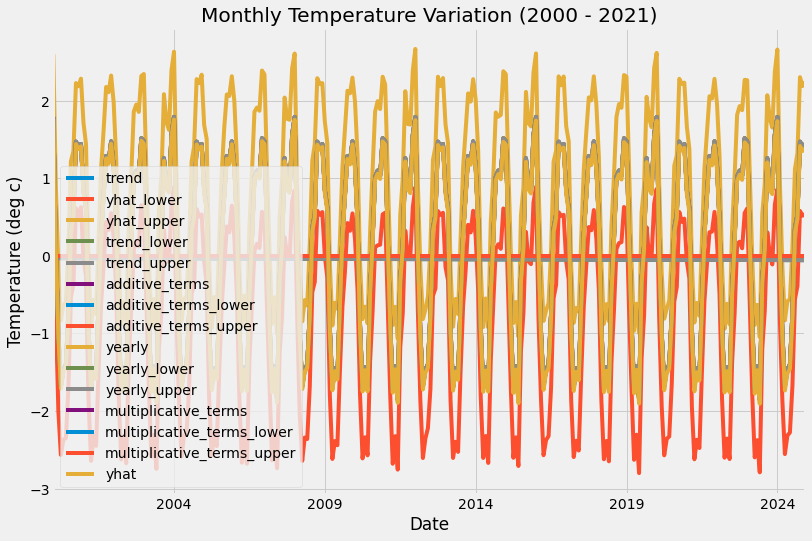

In [109]:
#df.plot()
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Temperature (deg c)')
ax.set_xlabel('Date')
plt.title('Monthly Temperature Variation (2000 - 2021)')
plt.show()

final_df.to_csv('Forecast_2_Univariate_Temp.csv')